In [105]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px

In [149]:
df = pd.read_csv("E:\\LEARNBAY\\Projects\\JUly\\kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

# Preprocessing 

In [151]:
# 1. Handling Missing Data

df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Only 'rc' and 'wc' has more than 25% missing data...few other features als have missing data, but at this moment...we will not change the same.

In [152]:
df['age'].value_counts()
df['age'] = np.where(df['age'].isna(),19,df['age'])

In [153]:
df['bp'].isna().sum()

12

In [154]:
# df['su'].value_counts()
df['bp'] = np.where(df['bp'].isna(),116,df['bp'])
df['sg'] = np.where(df['sg'].isna(),1.020,df['sg'])
df['al'] = np.where(df['al'].isna(),0.0,df['al'])
df['su'] = np.where(df['su'].isna(),.00,df['su'])

In [155]:
# df['hemo'].value_counts()
df['bgr'] = np.where(df['bgr'].isna(),99.0,df['bgr'])
df['bu'] = np.where(df['bu'].isna(),46.0,df['bu'])
df['sc'] = np.where(df['sc'].isna(),1.2,df['sc'])
df['sod'] = np.where(df['sod'].isna(),135.0,df['sod'])
df['pot'] = np.where(df['pot'].isna(),3.5,df['pot'])
df['hemo'] = np.where(df['hemo'].isna(),15.0,df['hemo'])

In [156]:
df['pcv'].value_counts()
df['rbc'] = np.where(df['rbc'].isna(),'normal',df['rbc'])
df['pc'] = np.where(df['pc'].isna(),'normal',df['pc'])
df['pcc'] = np.where(df['pcc'].isna(),'notpresent',df['pcc'])
df['ba'] = np.where(df['ba'].isna(),'notpresent',df['ba'])
df['pcv'] = np.where(df['pcv'].isna(),41.0,df['pcv'])
df['wc'] = np.where(df['wc'].isna(),9800,df['wc'])
df['rc'] = np.where(df['rc'].isna(),5.2,df['rc'])
df['htn'] = np.where(df['htn'].isna(),'no',df['htn'])
df['dm'] = np.where(df['dm'].isna(),258,df['dm'])
df['cad'] = np.where(df['cad'].isna(),'no',df['cad'])
df['cad'] = np.where(df['cad']=='\tno','no',df['cad'])
df['appet'] = np.where(df['appet'].isna(),'good',df['appet'])
df['pe'] = np.where(df['pe'].isna(),'no',df['pe'])
df['ane'] = np.where(df['ane'].isna(),'no',df['ane'])

In [192]:
df['dm'].value_counts()
df['dm'] = np.where(df['dm'].isna(),'no',df['dm'])
df['dm'] = np.where(df['dm']=='\tno','no',df['dm'])
df['dm'] = np.where(df['dm']=='\tyes','yes',df['dm'])
df['dm'] = np.where(df['dm']==' yes','yes',df['dm'])
df['dm'] = np.where(df['dm']==258,'no',df['dm'])
df['pcv'] = np.where(df['pcv']=='\t?',41.0,df['pcv'])
df['wc'] = np.where(df['wc']=='\t?',9800,df['wc'])
df['rc'] = np.where(df['rc']=='\t?',5.2,df['rc'])

In [193]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [194]:
(df=='\t?').sum() 

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [195]:
# Handled missig data.

In [179]:
# 2. Handling outliers

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.750,199.50,299.250,399.000
age,400.0,50.752500,17.646948,2.000,40.750,54.00,64.000,90.000
bp,400.0,77.655000,15.073121,50.000,70.000,80.00,80.000,180.000
sg,400.0,1.017712,0.005434,1.005,1.015,1.02,1.020,1.025
al,400.0,0.900000,1.313130,0.000,0.000,0.00,2.000,5.000
su,400.0,0.395000,1.040038,0.000,0.000,0.00,0.000,5.000
rbc,400.0,0.882500,0.322418,0.000,1.000,1.00,1.000,1.000
pc,400.0,0.810000,0.392792,0.000,1.000,1.00,1.000,1.000
pcc,400.0,0.105000,0.306937,0.000,0.000,0.00,0.000,1.000
ba,400.0,0.055000,0.228266,0.000,0.000,0.00,0.000,1.000


Not much variation is seen in the data. 

In [180]:
# 3. Encoding. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

There are many features which are object and needs encoding. We will do it after the EDA steps ends. 

In [161]:
# 4. Checking Ibalance in dataset. 

df['classification'].value_counts()/len(df)*100

ckd       62.0
notckd    37.5
ckd\t      0.5
Name: classification, dtype: float64

'ckd' and 'notckd' are balanced but it looks like that ckd/t is wrongly entered. We can replace it with 'CKD'.

In [162]:
df['classification'] = np.where(df['classification']=='ckd\t','ckd',df['classification'])

df['classification'].value_counts()/len(df)*100

ckd       62.5
notckd    37.5
Name: classification, dtype: float64

In [163]:
# 5. Feature scaling is a must which will be handled before train_test_split.

# Exploratory Data Analysis

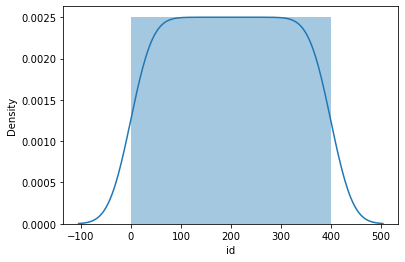

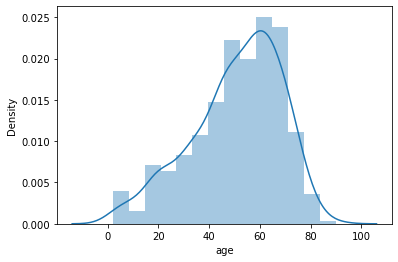

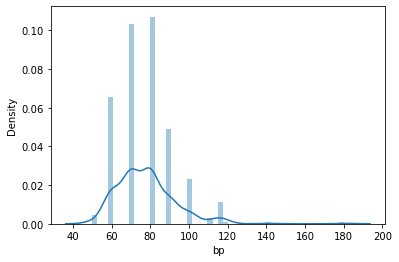

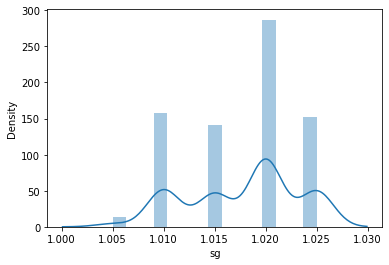

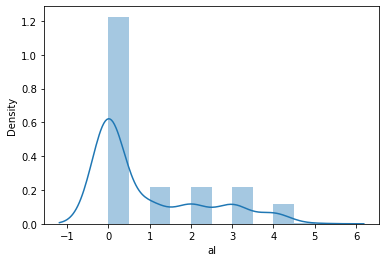

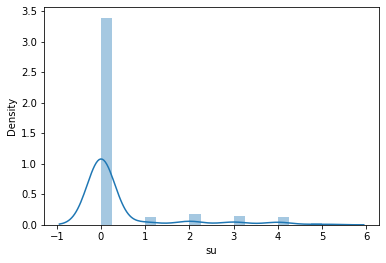

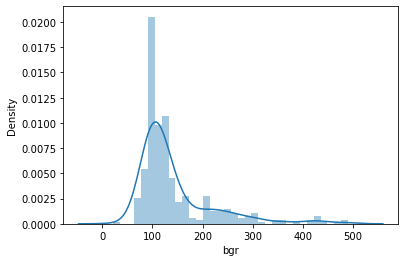

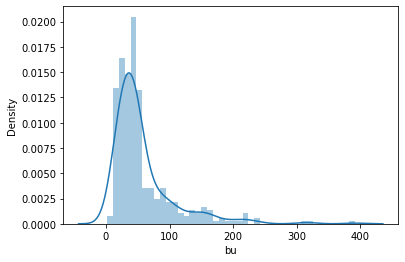

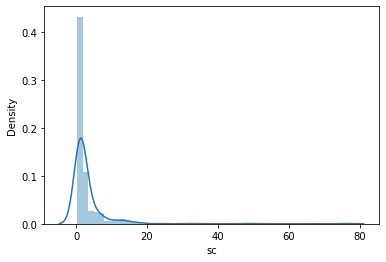

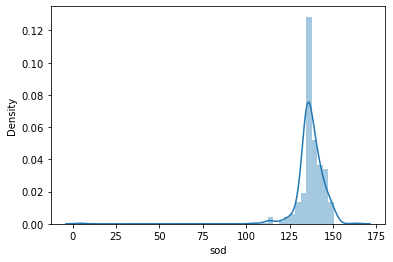

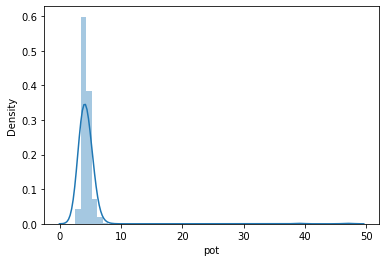

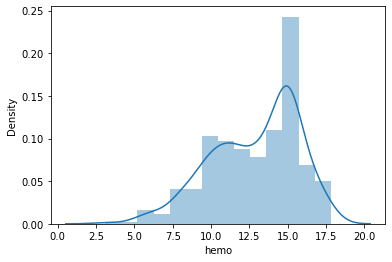

In [139]:
def dist(col):
    sns.distplot(df[col])
    plt.show()

for i in df.select_dtypes(exclude='object').columns:
    dist(i)

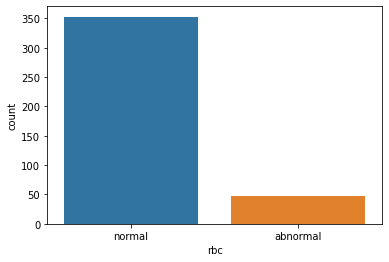

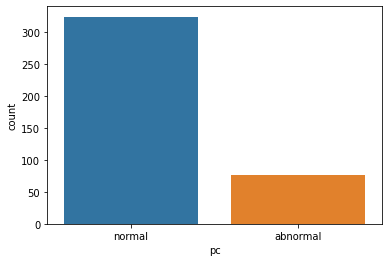

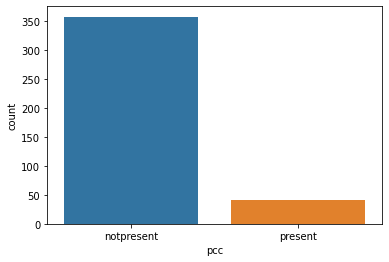

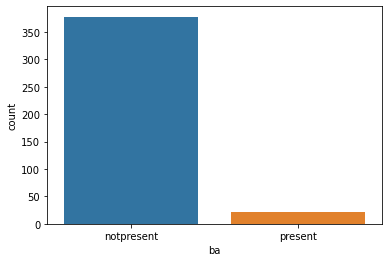

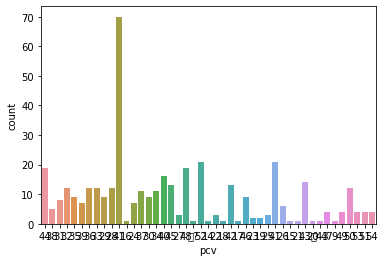

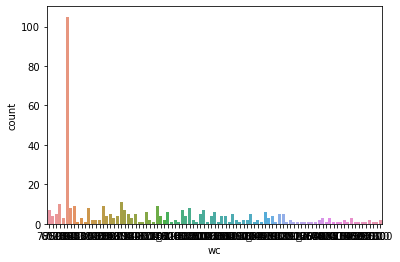

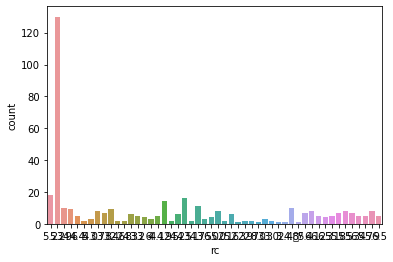

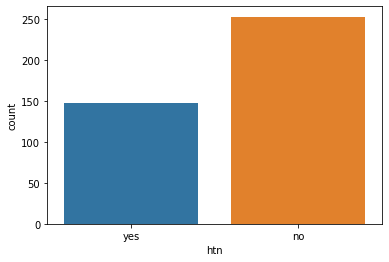

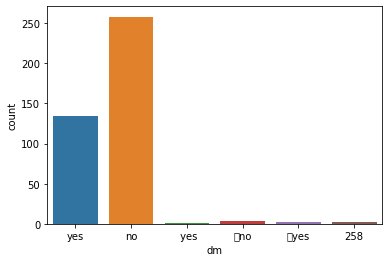

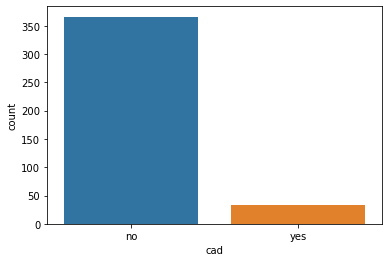

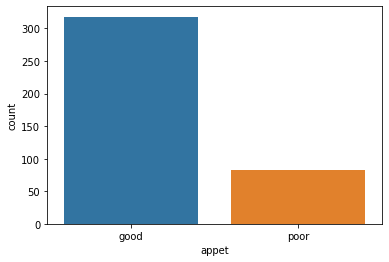

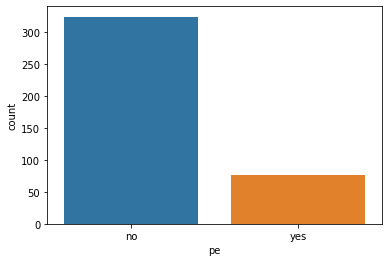

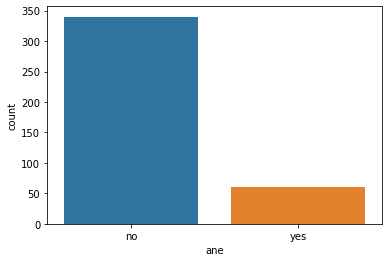

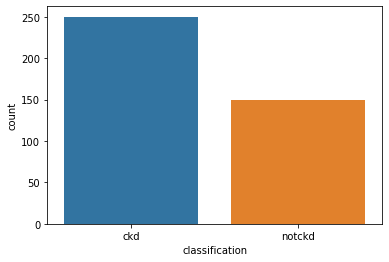

In [140]:
def count(col):
    sns.countplot(df[i])
    plt.show()
    
for i in df.select_dtypes(include='object').columns:
    count(i)

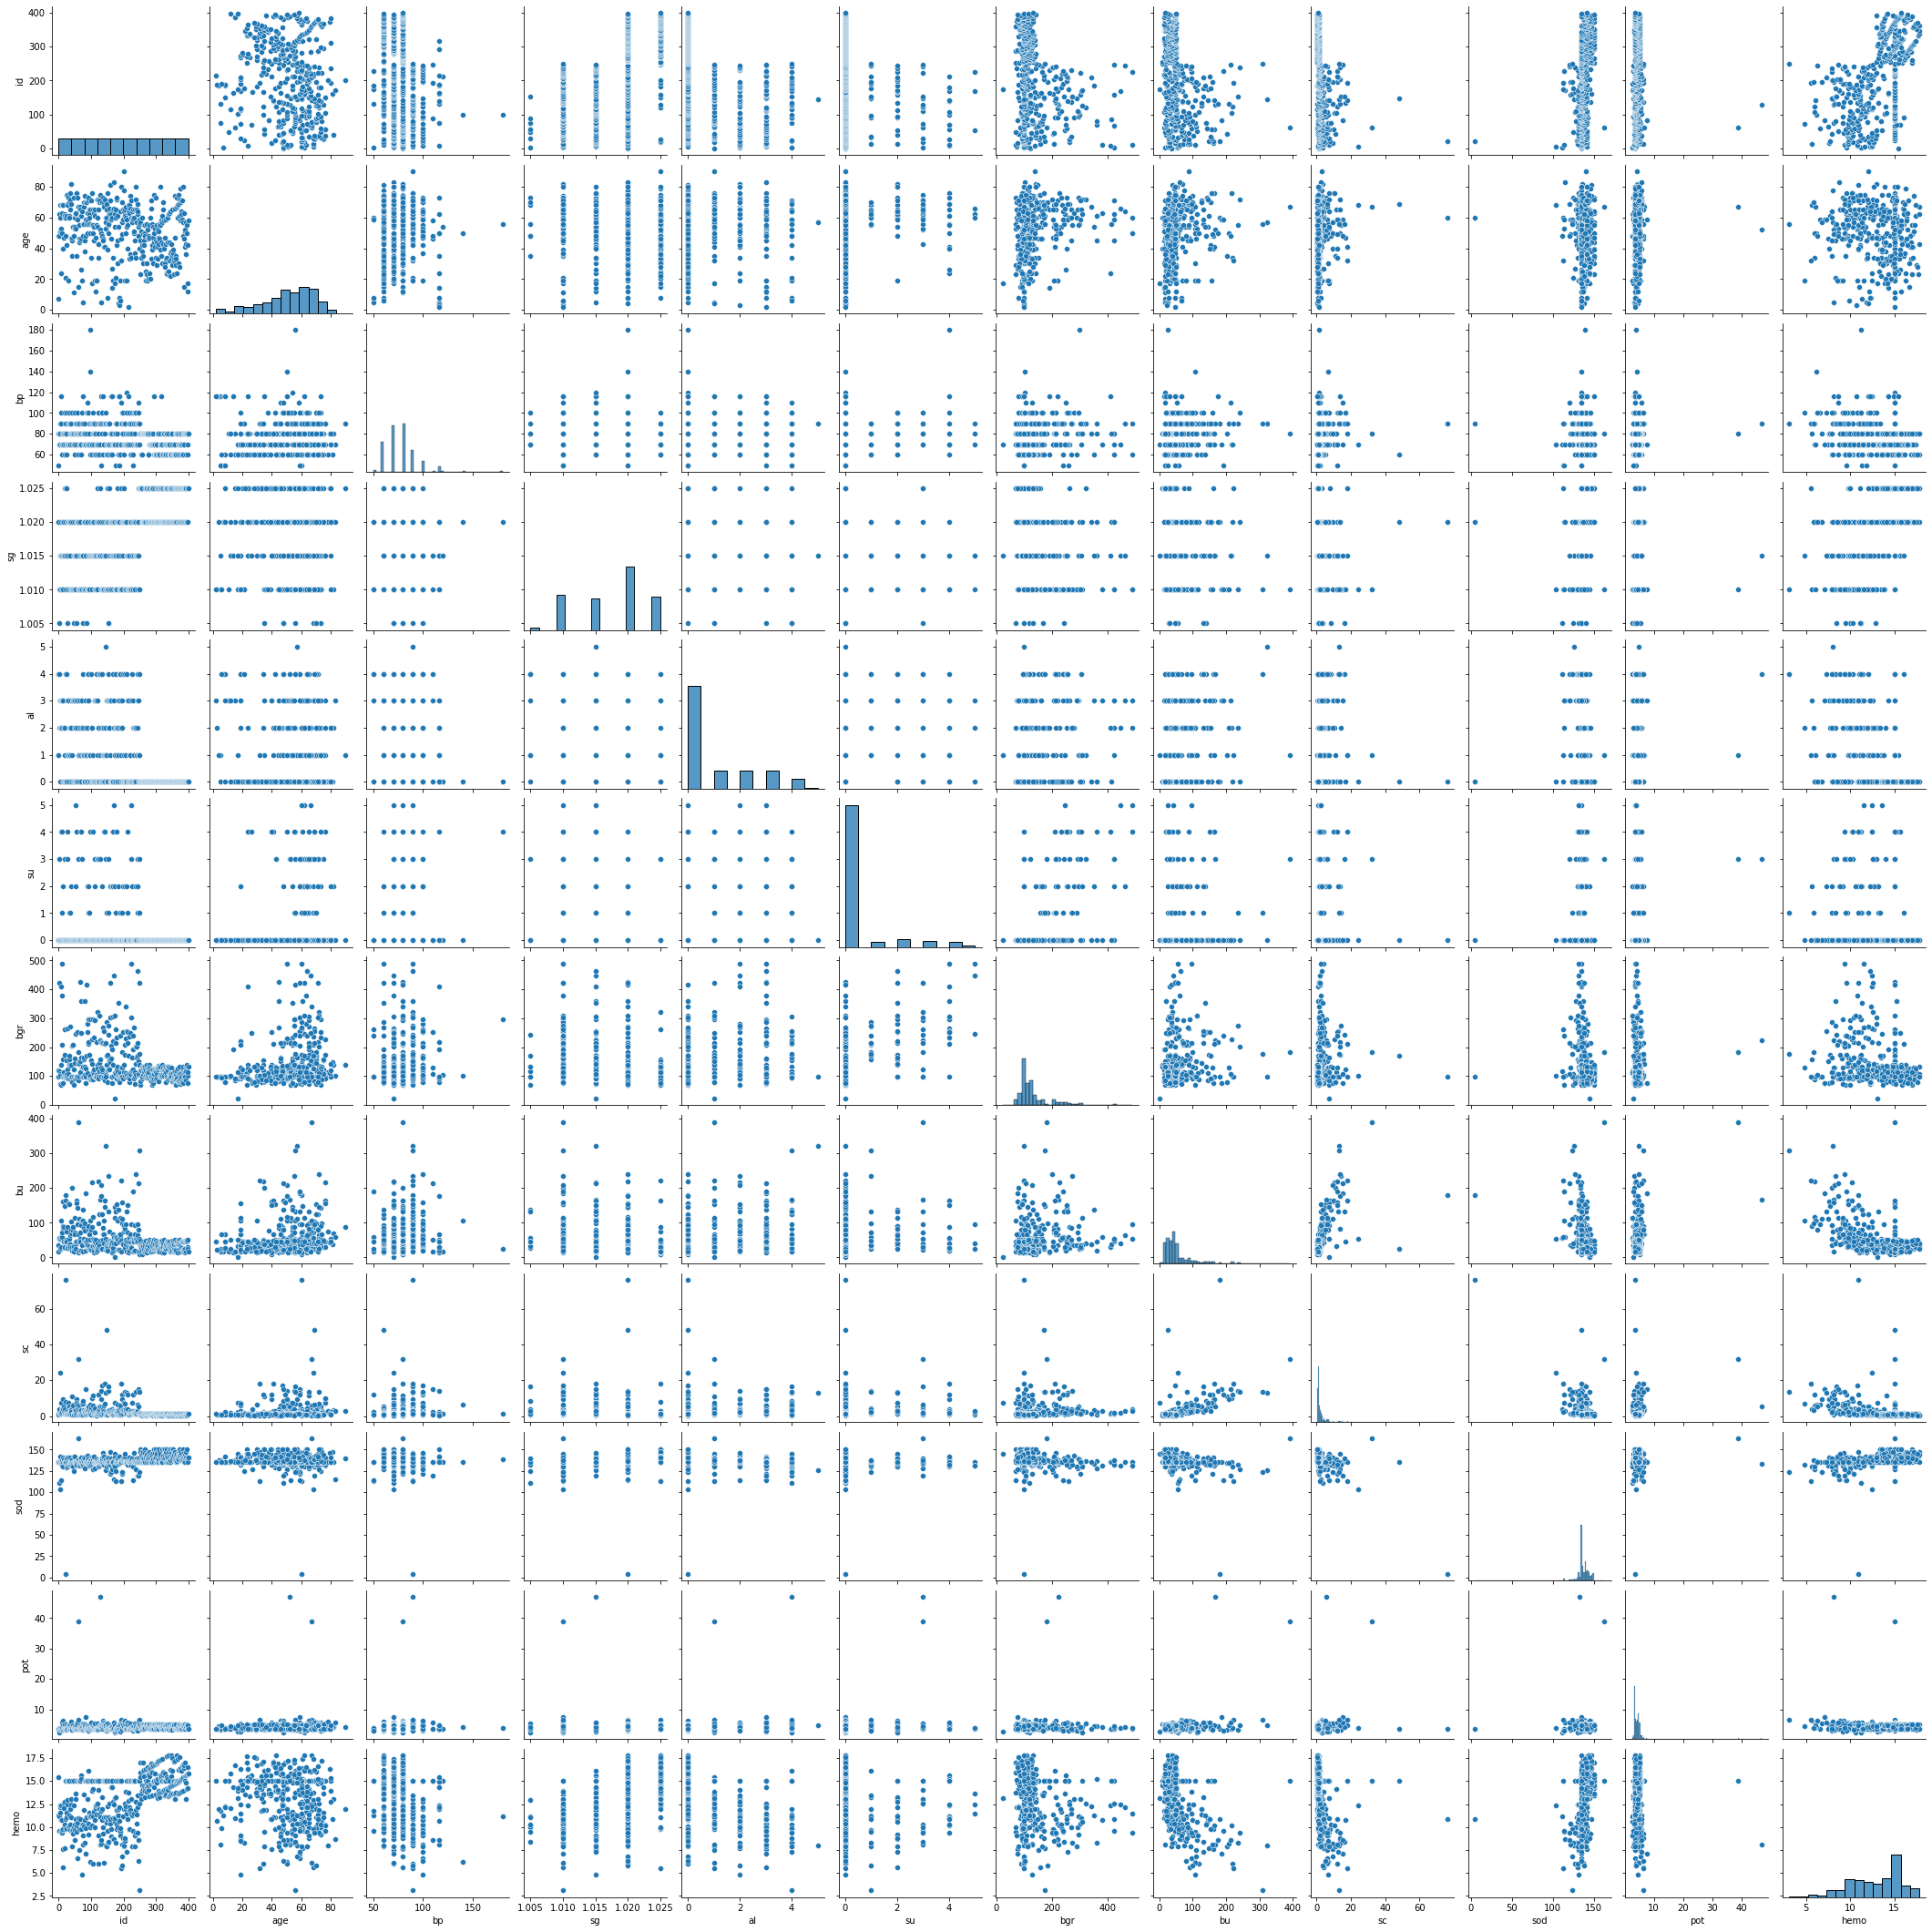

In [141]:
sns.pairplot(df)
plt.show()

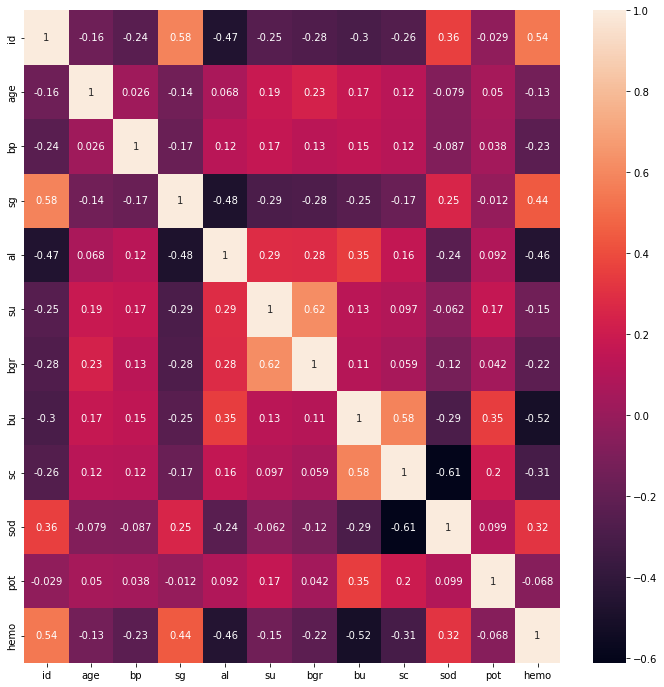

In [142]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

Insights:
    
1. Data seem to be normally distributed. 
2. Count plot was for categorical variable. -- ALl features had more than one values.
3. Not much correlation is seen. 

In [143]:
# from pandas_profiling import ProfileReport

# report = ProfileReport(df)
# report.to_file("Report_25thJUly.html")

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

#### Encoding the dataset

In [196]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['dm'] = le.fit_transform(df['dm'])
df['rbc']=le.fit_transform(df['rbc']) 
df['pc'] = le.fit_transform(df['pc'])
df['pcc']  = le.fit_transform(df['pcc'])
df['ba'] = le.fit_transform(df['ba'])
df['htn'] = le.fit_transform(df['htn'])
df['cad'] = le.fit_transform(df['cad'])
df['appet'] = le.fit_transform(df['appet'])
df['pe'] = le.fit_transform(df['pe'])
df['ane'] = le.fit_transform(df['ane'])
df['classification'] = le.fit_transform(df['classification'])

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [198]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44,7800,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38,6000,5.2,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31,7500,5.2,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32,6700,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35,7300,4.6,0,0,0,0,0,0,0


#### SPliting the data

In [199]:
x= df.iloc[:,0:-1]
x.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,15.4,44,7800,5.2,1,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,11.3,38,6000,5.2,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,9.6,31,7500,5.2,0,1,0,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,11.2,32,6700,3.9,1,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,11.6,35,7300,4.6,0,0,0,0,0,0


In [200]:
y = df['classification']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

#### Standard Scaler

In [201]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
scx = sc.fit_transform(x)
scx

array([[-1.72772608, -0.15617131,  0.15576978, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-1.7190658 , -2.48242885, -1.83702061, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-1.71040552,  0.63816053,  0.15576978, ...,  1.96927621,
        -0.4843221 ,  2.38047614],
       ...,
       [ 1.71040552, -2.19873891,  0.15576978, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 1.7190658 , -1.91504897, -1.17275715, ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 1.72772608,  0.41120857,  0.15576978, ..., -0.50780078,
        -0.4843221 , -0.42008403]])

# TRAINING AND TESTING DATASET:

In [202]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scx,y,test_size=0.2,random_state=101)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape) 

(320, 25) (80, 25) (320,) (80,)


# MODEL BUILDING

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [207]:
models = {'LogisticRegression':LogisticRegression(),
          'DecisionTreeClassifier':DecisionTreeClassifier(),
          'RandomForestClassifier':RandomForestClassifier(n_estimators=100,max_depth=10),
          'KNeighborsClassifier':KNeighborsClassifier(n_neighbors=5),
          'SVC':SVC(),
          'AdaBoostClassifier':AdaBoostClassifier(),
          'GradientBoostingClasfier':GradientBoostingClassifier(learning_rate=0.01),
          'XGBClassifier':XGBClassifier(),
         }

In [208]:
for name,val in models.items():
    name= val
    name.fit(x_train,y_train)
    y_pred_test = name.predict(x_test)
    y_pred_train = name.predict(x_train)
    print("***"*5,f'{name}',"***"*5)
    print("Accuracy Score for Train -", accuracy_score(y_train,y_pred_train))
    print("Accuracy Score for Test -", accuracy_score(y_test,y_pred_test))
    print(classification_report(y_test,y_pred_test))
    print(confusion_matrix(y_test,y_pred_test))
    print("______________________________________________________\n")
    

*************** LogisticRegression() ***************
Accuracy Score for Train - 1.0
Accuracy Score for Test - 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[52  0]
 [ 0 28]]
______________________________________________________

*************** DecisionTreeClassifier() ***************
Accuracy Score for Train - 1.0
Accuracy Score for Test - 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

[[52  0]
 [ 0 28]]
____________________

# Accuracy for all the models are very good.